# Otimização para o Problema de Recobrimento de Conjuntos

In [5]:
from ORLibrary_SPC.fetch_instance import get_data
from ORLibrary_SPC.parse_instance import parse_instance

import cplex
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip3 install PyQt5

## Modelo sem Relaxações

In [2]:
def modelo_MIP(instance_name: str):
    """
    Modelo usando CPLEX para obter uma solução ótima 
    para problema de recobrimento de conjuntos.

    Recebe uma instância no formato encontrado na ORLib e
    implementa uma solução gulosa sem relaxações.
    """

    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)

    # Obtém e processa os dados da instância
    # m = # linhas
    # n = # colunas
    # C = lista de custos para cada coluna
    # J = conjunto de comprimento m de listas com as colunas que cobrem cada linha (J[i])

    get_data(instance_url=f'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/{instance_name}.txt')
    m, n, C, J = parse_instance(instance_name=instance_name)

    if not m:
        print('Instance parsing failed.')
        return

    # Função objetivo, minimizar os custos (C)
    cpx.variables.add(obj=C,
                        lb=[0] * n, ub=[1] * n,
                        types=[cpx.variables.type.binary] * n,
                        names=[f'x_{j}' for j in range(n)])

    # Adiciona restrições para cada linha
    for i in range(m):
        coeff = [1]*len(J[i])
        
        # Linha i pode ser coberta pelas colunas em J[i]
        # Toda linha deve ser coberta por pelo menos 1 coluna
        cpx.linear_constraints.add(
            lin_expr=[cplex.SparsePair(ind=J[i], val=coeff)],
            senses=["G"],
            rhs=[1],
            names=[f'c_{i}']
        )

    # Configurando parâmetros do CPLEX
    cpx.parameters.mip.strategy.heuristicfreq.set(-1)
    cpx.parameters.mip.cuts.mircut.set(-1)
    cpx.parameters.mip.cuts.implied.set(-1)
    cpx.parameters.mip.cuts.gomory.set(-1)
    cpx.parameters.mip.cuts.flowcovers.set(-1)
    cpx.parameters.mip.cuts.pathcut.set(-1)
    cpx.parameters.mip.cuts.liftproj.set(-1)
    cpx.parameters.mip.cuts.zerohalfcut.set(-1)
    cpx.parameters.mip.cuts.cliques.set(-1)
    cpx.parameters.mip.cuts.covers.set(-1)
    cpx.parameters.threads.set(1)
    cpx.parameters.clocktype.set(1)
    cpx.parameters.timelimit.set(1800)

    # Escreve solução em um arquivo
    cpx.write("setcover.lp")

    cpx.solve()

    # Output da solução
    status = cpx.solution.get_status()
    progress = cpx.solution.progress.get_num_nodes_processed()
    solution_values = cpx.solution.get_values()
    objective_value = cpx.solution.get_objective_value()

    print('Solution status:                   %d' % status)
    print('Nodes processed:                   %d' %
            progress)
    tol = cpx.parameters.mip.tolerances.integrality.get()
    print('Optimal value:                     %f' %
          objective_value)
    values = cpx.solution.get_values()
    # for y in x:
    #     if values[x[y]] >= 1 - tol:
    #         print("x_" + str(x[y]) + "= " + str(values[x[y]]))

    return status, solution_values, objective_value

In [ ]:
status, solution_values, targetFn_value = modelo_MIP(instance_name='scpb1')

In [ ]:
print(f"Colunas utilizadas na solução: {solution_values.count(1)}")

## Modelo com Relaxação Linear

In [5]:
def modelo_LP(instance_name: str, show_output: bool = True):
    """"
    Modelo de relaxação linear para o problema de recobrimento de conjuntos.

    Recebe uma instância no formato encontrado na ORLib e
    implementa uma solução gulosa sem relaxações.
    """

    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)

    # Obtém e processa os dados da instância
    # m = # linhas
    # n = # colunas
    # C = lista de custos para cada coluna
    # J = conjunto de comprimento m de listas com as colunas que cobrem cada linha (J[i])

    get_data(instance_url=f'http://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/{instance_name}.txt')
    m, n, C, J = parse_instance(instance_name=instance_name)

    if not m:
        print('Instance parsing failed.')
        return

    # Função objetivo, minimizar os custos (C)
    cpx.variables.add(obj=C,
                        lb=[0] * n, ub=[1] * n,
                        types=[cpx.variables.type.continuous] * n,
                        names=[f'x_{j}' for j in range(n)])

    # Adiciona restrições para cada linha
    for i in range(m):
        coeff = [1]*len(J[i])
        
        # Linha i pode ser coberta pelas colunas em J[i]
        # Toda linha deve ser coberta por pelo menos 1 coluna
        cpx.linear_constraints.add(
            lin_expr=[cplex.SparsePair(ind=J[i], val=coeff)],
            senses=["G"],
            rhs=[1],
            names=[f'c_{i}']
        )

    # Configurando parâmetros do CPLEX
    cpx.parameters.mip.strategy.heuristicfreq.set(-1)
    cpx.parameters.mip.cuts.mircut.set(-1)
    cpx.parameters.mip.cuts.implied.set(-1)
    cpx.parameters.mip.cuts.gomory.set(-1)
    cpx.parameters.mip.cuts.flowcovers.set(-1)
    cpx.parameters.mip.cuts.pathcut.set(-1)
    cpx.parameters.mip.cuts.liftproj.set(-1)
    cpx.parameters.mip.cuts.zerohalfcut.set(-1)
    cpx.parameters.mip.cuts.cliques.set(-1)
    cpx.parameters.mip.cuts.covers.set(-1)
    cpx.parameters.threads.set(1)
    cpx.parameters.clocktype.set(1)
    cpx.parameters.timelimit.set(1800)

    # Escreve solução em um arquivo

    cpx.solve()

    # Output da solução
    status = cpx.solution.get_status()
    progress = cpx.solution.progress.get_num_nodes_processed()
    solution_values = cpx.solution.get_values()
    objective_value = cpx.solution.get_objective_value()
    
    if show_output:
        cpx.write("setcover_LP.lp")
        print('Solution status:                   %d' % status)
        print('Nodes processed:                   %d' %
                progress)
        tol = cpx.parameters.mip.tolerances.integrality.get()
        print('Optimal value:                     %f' %
            objective_value)
    values = cpx.solution.get_values()
    # for y in x:
    #     if values[x[y]] >= 1 - tol:
    #         print("x_" + str(x[y]) + "= " + str(values[x[y]]))

    return status, solution_values, objective_value
    

In [ ]:
lp_solution, lp_solution_values, lp_targetFn_value = modelo_LP(instance_name="scp41")

### Valores médios para classes de benchmark

Baseado nos resultados obtidos por Umetani e Yagiura (2007), realizamos múltiplos testes nas classes de benchmark para fins de comparação.

In [45]:
def benchmark_avg_LP(instance_class: str = "4"):
    available = {'4', '5', '6', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}
    if instance_class not in available:
        print("Esta classe de isntancias não foi encontrada. Classes disponíveis:")
        print(available)
        return None

    if instance_class == "4" or instance_class == "5":
        class_size = 10
    else:
        class_size = 5

    targetFn_values = []
    for i in range(1,class_size+1):
        _,_, target_val = modelo_LP(instance_name=f'scp{instance_class}{i}', show_output=False)
        targetFn_values.append(target_val)

    return np.average(np.array(targetFn_values))

In [ ]:
benchmark_avg_LP(instance_class="6")

In [52]:
def benchmark_batch(classes):

    for c in classes.keys():
        classes[c] = benchmark_avg_LP(instance_class=c)

    return classes

In [ ]:
results = benchmark_batch(classes={'A':-1, 'B':-1, 'C':-1})

In [ ]:
results

Resultados condizentes com os encontrados nos benchmarks!

## Modelo com Relaxação Lagrangeana

In [70]:
def get_covering_matrix(instance_name: str):
    """
    Retorna uma matriz de cobertura com dimentsões m x n, valores binários.
    """

    m, n, C, J = parse_instance(instance_name=instance_name)

    A = np.zeros((m, n), dtype=int)
    for i, cols in enumerate(J):
        for j in cols:
            A[i][j] = 1
    
    return  m, n, C, J, A.tolist()


In [ ]:
_,_,_,_, A = get_covering_matrix('scp41')
print(len(A), ' x ', len(A[0]))

In [ ]:
def subradient(instance_name: str, max_iters: int=1000, step_size: int=0.02):
    """
    Método do subgradiente para obter os Multiplicadores de Lagrange
    que serão usados no Subproblema Lagrangeano
    """
    m, n, C, J, A = get_covering_matrix(instance_name=instance_name)
    # Inicializando lista de multiplicadores de lagrange com zeros
    u = [0] * m

    
    

In [6]:
class Lagrangian_SPC():
    """
    Classe que implementa métodos para o modelo de Relaxação Lagrangiana.
    """

    def __init__(self, instance_name: str, ub=None) -> None:
        self.instance_name = instance_name
        self.m, self.n, self.costs, self.J = parse_instance(instance_name)
        self.A = self.set_covering_matrix()
        self.hist_lb = None
        self.ub = (np.dot(self.costs, np.ones(self.n))) if ub is None else ub
    
    def set_covering_matrix(self):
        """
        Retorna uma matriz de cobertura com dimentsões m x n, valores binários.
        """

        self.A = np.zeros((self.m, self.n), dtype=int)
        for i, cols in enumerate(self.J):
            for j in cols:
                self.A[i][j] = 1
        self.A = self.A.tolist()

        return  self.A
    
    def lagrangian_relaxation(self, u):
        """
        Resolve a relaxação lagrangiana para o problema de recobrimento

        Retorna:
        z_lr (float): Lagrangian relaxation objective value.
        x (list): Solution vector for LR(u).
        """

        # Calcula os custos reduzidos c'_j(u) = c_j - sum(a_{ij} * u_i)
        reduced_costs = np.array(self.costs) - np.dot(u, self.A)

        x = np.zeros(self.n)
        for j in range(self.n):
            if reduced_costs[j] < 0:
                x[j] = 1
            # elif reduced_costs[j] == 0:
            #     # Escolhe aleatoriamente entre 0 e 1 caso c'_j = 0
            #     x[j] = np.random.choice([0, 1])

        # Compute the Lagrangian relaxation objective value
        subgrad = np.ones(self.m) - np.dot(self.A, x)
        z_lr = np.dot(self.costs, x) + np.dot(u, subgrad)

        return z_lr, x, subgrad
    
    def solve_lagrangian_dual(self, max_iters: int=1000, step_size=0.02, pi=2.0, plot=False, tolerance=0):
        """
        Solves the Lagrangian Dual problem to find the best Lagrangian multipliers u.

        Returns:
        best_u (list): Optimal Lagrangian multipliers.
        best_z (float): Optimal Lagrangian objective value.
        best_x (list): Best solution vector.
        """

        u = np.zeros(self.m)

        best_u = u.copy()
        best_z = -np.inf
        best_x = None

        no_update = 0
        half = max_iters // 20
        halved = 0
        
        if plot:
            self.hist_lb = []

        for _ in range(max_iters):
            if no_update == half:
                pi /= 2.0
                no_update = 0
                halved += 1
                print(pi)
                
                if pi < tolerance:
                    break

            # Solve the Lagrangian relaxation for the current u
            z_lr, x, subgrad = self.lagrangian_relaxation(u)

            if plot:
                self.hist_lb.append(z_lr)
                
            # Update the best solution found so far
            if z_lr > best_z:
                best_z = z_lr
                best_u = u.copy()
                best_x = x.copy()
                no_update = 0
            else:
                no_update += 1
            
            if self.ub - z_lr < 1:
                break
                
            # Adjust the Lagrangian multipliers based on the violation of constraints
            T = pi * (self.ub - z_lr) / np.sum(np.square(subgrad)) # 1 - np.dot(self.A, x)
            u = u + (1 + step_size) * T * subgrad
            u = np.maximum(u, 0)  # Ensure u remains non-negative   
        
        if plot:
            self.__plot()

        return best_u, best_z, best_x
    
    def __plot(self):
        fig = plt.figure(figsize=(16,9))
        
        iterations = range(1, len(self.hist_lb) + 1)
    
        plt.plot(iterations, self.hist_lb, label='Lower Bound $z_{LR}(u)$')
        plt.title("Lagrangian Relaxation: Lower Bound over Iterations", fontsize=16)
        plt.xlabel("Iteration", fontsize=14)
        plt.ylabel("Lower Bound $z_{LR}(u)$", fontsize=14)
        plt.grid(True)
        plt.legend(loc='best')
        
        plt.show()
        

In [5]:
_,_,opt = modelo_MIP(instance_name='scp41')

Data saved to scp41.txt
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_ClockType                               1
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Threads                                 1
CPXPARAM_MIP_Cuts_Cliques                        -1
CPXPARAM_MIP_Cuts_Covers                         -1
CPXPARAM_MIP_Cuts_FlowCovers                     -1
CPXPARAM_MIP_Cuts_Implied                        -1
CPXPARAM_MIP_Cuts_Gomory                         -1
CPXPARAM_MIP_Cuts_PathCut                        -1
CPXPARAM_MIP_Cuts_MIRCut                         -1
CPXPARAM_MIP_Cuts_ZeroHalfCut                    -1
CPXPARAM_MIP_Cuts_LiftProj                       -1
CPXPARAM_MIP_Strategy_HeuristicFreq              -1
CPXPARAM_TimeLimit                               1800
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 61 columns.
Reduced MIP has 200 rows, 939 columns, and 3928 nonzeros.
Reduced MIP has 939 binaries, 0 generals, 0 SOSs, and 0 indicator

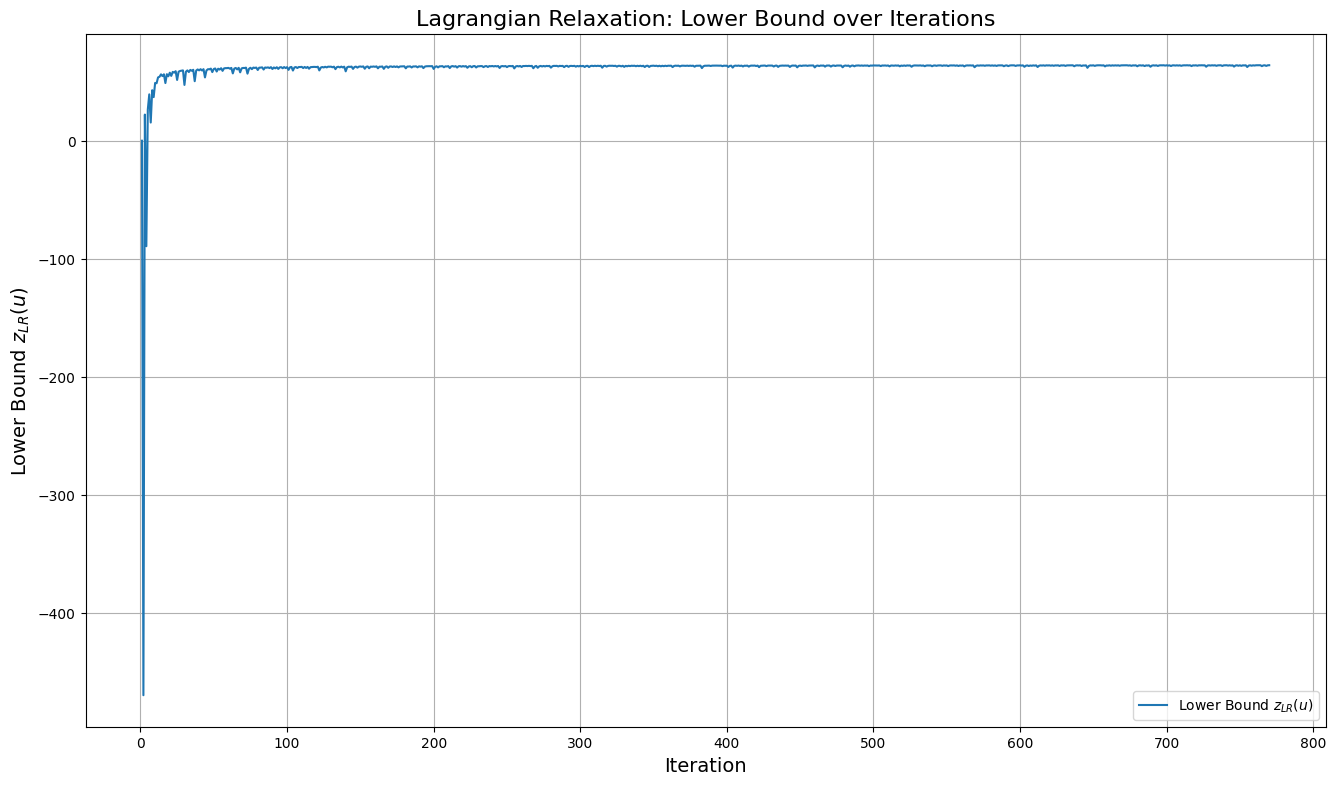

In [9]:
lag_scp = Lagrangian_SPC( instance_name='scpb1', ub=65)

u, z, x = lag_scp.solve_lagrangian_dual(plot=True, tolerance=0)

In [7]:
%matplotlib qt
fig = plt.figure(figsize=(16,9))

iterations = range(1, len(lag_scp.hist_lb) + 1)

plt.plot(iterations, lag_scp.hist_lb, label='Lower Bound $z_{LR}(u)$')
plt.title("Lagrangian Relaxation: Lower Bound over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Lower Bound $z_{LR}(u)$", fontsize=14)
plt.grid(True)
plt.legend(loc='best')

plt.show()

: 

In [ ]:
z